# NLP 101 using Spacy

MIMIC III NLP
AI 395T - AI in Healthcare - Dr. Ying Ding

Joseph Skrovan, 2/23/2025

GitHub repo: git@github.com:jskrovan2/aihc.git

This works on a local copy of the MIMIC III dataset. I distilled notes from the large NOTEEVENTS table with:
    distill_notes.py
Which selected notes that contained "metformin", primarily selecting for patients with type 2 diabetes, and created a smaller, "noteevents_metformin.parquet", table.
    
Some code was copied from class Jupyter notebooks from Modules 6 and 7.
Some code was produced by ChatGPT. No MIMIC III data was sent to ChatGPT.

# distill_notes.py

import duckdb

con = duckdb.connect()

# Create a temporary view of the CSV file
con.execute("""
    CREATE TEMPORARY VIEW noteevents_view AS
    SELECT * FROM
    read_csv_auto('NOTEEVENTS.csv.gz')
""")

# Read from huge table and save filtered table in small parquet file.
# Modify the WHERE clause to find the notes you're interested in.
new_table = 'noteevents_metformin.parquet'
con.execute(f"""
    COPY (SELECT * FROM noteevents_view
          WHERE text ILIKE '%metformin%')
    TO '{new_table}' (FORMAT PARQUET)
""")
print(f"Filtered data saved to '{new_table}'")

In [ ]:
import duckdb

# Select notes that mention taking metformin but not diabetes to find a
# smaller set of notes to review.
con = duckdb.connect()
table = 'noteevents_metformin.parquet'
df = con.execute(f"""
    SELECT * FROM '{table}'
    WHERE text ILIKE '%taking metformin%' and text NOT ILIKE '%diabetes%';
""").df()

# Look and the first note.
print(df["TEXT"][0])


Admission Date:  [**2196-12-13**]              Discharge Date:   [**2196-12-15**]

Date of Birth:  [**2161-1-22**]             Sex:   F

Service: MEDICINE

Allergies:
No Known Allergies / Adverse Drug Reactions

Attending:[**First Name3 (LF) 1257**]
Chief Complaint:
Metformin Overdose

Major Surgical or Invasive Procedure:
None.


History of Present Illness:
The patient was not cooperative with the interview and refused
to participate in the full history and physical.
.
HPI: This is a 35 year-old female with a history of Hepatitis C
who presents following an overdose. The patient reports that she
was in her usual state of health. At 3am on [**2196-12-13**] she states
she accidently took 10 pills of metformin thinking that it was
neurontin. She also reports recent relapse of crack cocaine and
heroin. The patient reports that she developed abdominal pain,
nausea, vomiting, and diarrhea. Per Tox report she had 5
episodes of emesis. The patient also reports lower back pain
that began this 

In [147]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(df["TEXT"][0])
tokens = doc.text.split()

/Users/joseph/miniconda3/envs/deeplearning/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [148]:
print(f"Token count: {len(tokens)}")
print(tokens)

Token count: 1634
['Admission', 'Date:', '[**2196-12-13**]', 'Discharge', 'Date:', '[**2196-12-15**]', 'Date', 'of', 'Birth:', '[**2161-1-22**]', 'Sex:', 'F', 'Service:', 'MEDICINE', 'Allergies:', 'No', 'Known', 'Allergies', '/', 'Adverse', 'Drug', 'Reactions', 'Attending:[**First', 'Name3', '(LF)', '1257**]', 'Chief', 'Complaint:', 'Metformin', 'Overdose', 'Major', 'Surgical', 'or', 'Invasive', 'Procedure:', 'None.', 'History', 'of', 'Present', 'Illness:', 'The', 'patient', 'was', 'not', 'cooperative', 'with', 'the', 'interview', 'and', 'refused', 'to', 'participate', 'in', 'the', 'full', 'history', 'and', 'physical.', '.', 'HPI:', 'This', 'is', 'a', '35', 'year-old', 'female', 'with', 'a', 'history', 'of', 'Hepatitis', 'C', 'who', 'presents', 'following', 'an', 'overdose.', 'The', 'patient', 'reports', 'that', 'she', 'was', 'in', 'her', 'usual', 'state', 'of', 'health.', 'At', '3am', 'on', '[**2196-12-13**]', 'she', 'states', 'she', 'accidently', 'took', '10', 'pills', 'of', 'metform

In [149]:
tokens_without_punct = [token.orth_ for token in doc if not token.is_punct | token.is_space]
print(f"Tokens (without punctuation) count: {len(tokens_without_punct)}")
print(tokens_without_punct)

Tokens (without punctuation) count: 1740
['Admission', 'Date', '2196', '12', '13', 'Discharge', 'Date', '2196', '12', '15', 'Date', 'of', 'Birth', '2161', '1', '22', 'Sex', 'F', 'Service', 'MEDICINE', 'Allergies', 'No', 'Known', 'Allergies', 'Adverse', 'Drug', 'Reactions', 'Attending:[**First', 'Name3', 'LF', '1257', 'Chief', 'Complaint', 'Metformin', 'Overdose', 'Major', 'Surgical', 'or', 'Invasive', 'Procedure', 'None', 'History', 'of', 'Present', 'Illness', 'The', 'patient', 'was', 'not', 'cooperative', 'with', 'the', 'interview', 'and', 'refused', 'to', 'participate', 'in', 'the', 'full', 'history', 'and', 'physical', 'HPI', 'This', 'is', 'a', '35', 'year', 'old', 'female', 'with', 'a', 'history', 'of', 'Hepatitis', 'C', 'who', 'presents', 'following', 'an', 'overdose', 'The', 'patient', 'reports', 'that', 'she', 'was', 'in', 'her', 'usual', 'state', 'of', 'health', 'At', '3', 'am', 'on', '2196', '12', '13', 'she', 'states', 'she', 'accidently', 'took', '10', 'pills', 'of', 'metfor

In [ ]:
lines = []
for text in df["TEXT"]:
    doc = nlp(text)
    tokens_without_punct = [token.orth_ for token in doc if not token.is_punct | token.is_space]
    lines.append(tokens_without_punct)

for line in lines:
    print(f"Token count: {len(line)}")
    print(line)
    print('-'*80)

Token count: 1740
['Admission', 'Date', '2196', '12', '13', 'Discharge', 'Date', '2196', '12', '15', 'Date', 'of', 'Birth', '2161', '1', '22', 'Sex', 'F', 'Service', 'MEDICINE', 'Allergies', 'No', 'Known', 'Allergies', 'Adverse', 'Drug', 'Reactions', 'Attending:[**First', 'Name3', 'LF', '1257', 'Chief', 'Complaint', 'Metformin', 'Overdose', 'Major', 'Surgical', 'or', 'Invasive', 'Procedure', 'None', 'History', 'of', 'Present', 'Illness', 'The', 'patient', 'was', 'not', 'cooperative', 'with', 'the', 'interview', 'and', 'refused', 'to', 'participate', 'in', 'the', 'full', 'history', 'and', 'physical', 'HPI', 'This', 'is', 'a', '35', 'year', 'old', 'female', 'with', 'a', 'history', 'of', 'Hepatitis', 'C', 'who', 'presents', 'following', 'an', 'overdose', 'The', 'patient', 'reports', 'that', 'she', 'was', 'in', 'her', 'usual', 'state', 'of', 'health', 'At', '3', 'am', 'on', '2196', '12', '13', 'she', 'states', 'she', 'accidently', 'took', '10', 'pills', 'of', 'metformin', 'thinking', 'that

In [14]:
context = 4
words_of_interest = {"metformin", "cocaine", "alcohol"}
max_length = max(len(word) for word in words_of_interest)
for line in lines:
    metformin_indices = [i for i, token in enumerate(line) if token.lower() in words_of_interest]
    for i in metformin_indices:
        before = ' '.join(line[i-context:i])
        after = ' '.join(line[i+1:i+context+1])
        print(f'{before:>40}  {line[i].center(max_length)}  {after}')
    print('-'*100)

                 LF 1257 Chief Complaint  Metformin  Overdose Major Surgical or
                        took 10 pills of  metformin  thinking that it was
                 recent relapse of crack   cocaine   and heroin The patient
                     for BZD opiates and   cocaine   Her glucose remained at
                 relapse with heroin and   cocaine   use Family History Unable
                 barbitr NEG opiates POS   cocaine   POS amphetm NEG mthdone
          back pain following accidental  metformin  overdose Plan Overdose The
                      taking 10 pills of  metformin  Denies suicidal ideation preceding
             an expected complication of  metformin  overdose Patient was found
              arrival Pt reported taking  metformin  but this is not
                     history of drug and   alcohol   abuse Tox screen +
                    Tox screen + opiates   cocaine   benzos on admission Placed
--------------------------------------------------------------------

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
ent_lines = []
for text in df["TEXT"]:
    doc = nlp(text)
    ents = [ent.text for ent in doc.ents]
    ent_lines.append(ents)

for line in ent_lines:
    print(f"Ent count: {len(line)}")
    print(line)
    print('-'*80)

Ent count: 149
['Admission Date:  ', '2196-12-13', '2196-12-15', '2161', 'F\n\nService', 'Name3 (LF', '1257', 'Metformin Overdose', '35 year-old', 'Hepatitis', '3am', '2196-12-13', '10', 'Tox', '5', 'this morning', 'ED', '98.3', '20 100%', 'RA', 'WBC', '83%', 'Flagyl', 'CTX', '4.0', '17', 'Bicarb', '19', 'Cr', '1.4', 'Tox', 'BZD', '43', '3', 'D10', 'q4', 'ROS', 'melena', 'hematochezia', '86', '1/2ppd', '15years', 'EtOH', 'MMM', 'COR', 'S1 S2', 'ND', 'HSM', 'XII', '4', '18 O2', '100%', 'RA', 'COR', 'S1 S2', 'ND', 'HSM', 'XII', '2196-12-13', '01:15PM', '#', '2196-12-13', '01:15PM', '2196-12-13', '2196-12-13', '01:15PM', '2196-12-13', '01:15PM', '2196-12-13', '01:15PM', '2196-12-13', '01:15PM', '2196-12-13', '01:15PM', 'Bnzodzp-NEG Barbitr-NEG', 'Tricycl-NEG', '2196-12-13', 'calTCO2-20', '2196-12-13', '2196-12-13', 'Urine', '2196-12-13', 'un', '2196-12-13', 'Glucose-NEG Ketone-TR Bilirub-SM Urobiln-NEG', 'Leuks-NEG', '2196-12-13', '2', 'Bacteri-NONE Yeast-NONE\nEpi-0-2', '2196-12-13', '21

In [16]:
# Entity Visualizer
for text in df["TEXT"]:
    doc = nlp(text)
    print(f'{len(doc.ents)} entities')
    print('-'*100)
# Display last document
displacy.render(doc, style="ent", jupyter=True)

149 entities
----------------------------------------------------------------------------------------------------
15 entities
----------------------------------------------------------------------------------------------------
133 entities
----------------------------------------------------------------------------------------------------
145 entities
----------------------------------------------------------------------------------------------------
269 entities
----------------------------------------------------------------------------------------------------
23 entities
----------------------------------------------------------------------------------------------------
17 entities
----------------------------------------------------------------------------------------------------
31 entities
----------------------------------------------------------------------------------------------------


# SciSpacy Tutorial

In [11]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_sm-0.2.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_craft_md-0.4.0.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_jnlpba_md-0.2.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bc5cdr_md-0.2.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_ner_bionlp13cg_md-0.2.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [ ]:
import scispacy
import en_core_sci_md
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md
nlps = {
    'core_sci_md': en_core_sci_md.load(),
    'ner_craft_md': en_ner_craft_md.load(),
    'ner_jnlpba_md': en_ner_jnlpba_md.load(),
    'ner_bc5cdr_md': en_ner_bc5cdr_md.load(),
    'ner_bionlp13cg_md': en_ner_bionlp13cg_md.load(),
}
for model in nlps:
    print(f'{model.center(20)}', end=' ')
print()
print('-'*100)
for text in df["TEXT"]:
    for nlp in nlps.values():
        doc = nlp(text)
        print(f'  {len(doc.ents):10}        ', end=' ')
    print()
    print('-'*100)
# Display last document with ner_bionlp13cg_md
doc = nlps['ner_bionlp13cg_md'](df["TEXT"].iloc[-1])
displacy.render(doc, style="ent", jupyter=True)

    core_sci_md          ner_craft_md        ner_jnlpba_md        ner_bc5cdr_md      ner_bionlp13cg_md   
----------------------------------------------------------------------------------------------------
         560                   45                   33                   96                  163         
----------------------------------------------------------------------------------------------------
          29                    3                    3                    3                   11         
----------------------------------------------------------------------------------------------------
         258                   13                    3                   66                  100         
----------------------------------------------------------------------------------------------------
         264                   13                    3                   61                   96         
------------------------------------------------------------------

In [21]:
#doc = nlps['ner_bionlp13cg_md'](df["TEXT"].iloc[0])
#displacy.render(doc, style="ent", jupyter=True)

In [ ]:
import re

In [ ]:
# Build corpus of all the entities extracted from the notes using bionlp13cg_md model
# The corpus is a list of lists where each of the nested lists corresponds to a note.
df_met = con.execute(f"""
    SELECT * FROM 'noteevents_metformin.parquet';
""").df()
remove_terms = {'patient', 'tablet sig', 'tablet po', 'hospital1', 'hospital2', 'hospital3',
                'tablet', 'blood', 'capsule', 'refills:*2', 'p.o', '[*', 'po', 'oral', 'chewable',
                'q.d', 'b.i.d', 'tid', 't.i.d', 'q4h', 'qhs', 'prn', 'q6h', 'q8h', 'q12h', 'q24h'}
term_counts = {}
corpus=[]
for i, text in enumerate(df_met["TEXT"].iloc[:1000]):
    ents = nlps['ner_bionlp13cg_md'](text).ents
    ents = [ent.lemma_ for ent in ents if
            '**' not in ent.lemma_ and
            not re.match('\d', ent.lemma_) and
            ent.label_ not in {'DATE', 'TIME'} and
            ent.lemma_.lower() not in remove_terms and
            'tablet' not in ent.lemma_.lower()
           ]
    corpus.append(ents)
    if i % 100 == 0:
        print(f'{i}',
              end=' ',
              flush=True)
    for ent in ents:
        term_counts[ent] = term_counts.get(ent, 0) + 1

print()
common_ents = sorted(term_counts, key=term_counts.get, reverse=True)
for ent in common_ents[:10]:
    print(f'{ent:20} {term_counts[ent]}')

print(corpus)

0 100 200 300 400 500 600 700 800 900 
cardiac              1640
metformin            1621
heart                1516
aspirin              1314
edema                1120
coronary artery      1101
insulin              1071
lisinopril           938
pulmonary            862
lung                 854
[['Zocor', 'lescol', 'jugular vein', 'man', 'mitral', 'aortic insufficiency', 'ventricular systolic heart', 'svg-rca', 'peripheral arterial', 'peripheral', 'er', 'heart', 'bp', 'o2', 'ra', 'heart', 'troponin-i', 'ck 70', 'aspirin', 'furosemide', 'Nitropaste', 'lovenox', 'bp', 'water', 'ros', 'Plavix', 'Lovenox', 'coronary artery', 'peripheral arterial', 'iliac', 'artery', 'iliac artery', 'LV systolic heart', 'cardiac', 'svg-rca', 'coronary', 'om1', 'PDA', 'graft', 'stump', 'graft', 'supravalvular', 'graft', 'mid-lad', 'graft', 'lad', 'tobacco', 'alcohol', 'coronary', 'brother', 'nad', 'vs t 101 bp 88/54 hr', 'oral mucosa', 'jvp', 'jaw', 'heart', 'muscle', 'wall', 'lung', 'aorta', 'ext', 'femoral

In [ ]:
# Build corpus of all the entities extracted from the notes using bionlp13cg_md model
term_counts_organ_chemical = {}
corpus_organ_chemical=[]
for i, text in enumerate(df_met["TEXT"].iloc[:1000]):
    ents = nlps['ner_bionlp13cg_md'](text).ents
    ents = [ent.lemma_ for ent in ents if
            '**' not in ent.lemma_ and
            not re.match('\d', ent.lemma_) and
            ent.label_ in {'SIMPLE_CHEMICAL', 'ORGAN'} and
            ent.lemma_.lower() not in remove_terms and
            'tablet' not in ent.lemma_.lower()
           ]
    corpus_organ_chemical.append(ents)
    if i % 100 == 0:
        print(f'{i}',
              end=' ',
              flush=True)
    for ent in ents:
        term_counts_organ_chemical[ent] = term_counts_organ_chemical.get(ent, 0) + 1

print()
common_organ_chemical_ents = sorted(term_counts_organ_chemical, key=term_counts_organ_chemical.get, reverse=True)
for ent in common_organ_chemical_ents[:50]:
    print(f'{ent:20} {term_counts_organ_chemical[ent]}')


0 100 200 300 400 500 600 700 800 900 
metformin            1619
cardiac              1518
heart                1461
aspirin              1309
lisinopril           938
pulmonary            862
lung                 826
lasix                806
bowel                688
bp                   673
coumadin             648
creatinine           576
oxygen               506
o2                   505
hco3                 463
heparin              463
vancomycin           419
prednisone           410
docusate sodium      409
simvastatin          404
alcohol              364
glipizide            357
pcp                  357
furosemide           349
amiodarone           349
plavix               346
atorvastatin         342
lipitor              338
liver                336
metoprolol           332
kidney               332
co2                  297
levofloxacin         296
acetaminophen        289
sodium               285
eye                  275
skin                 273
glucose              255
pantopr

In [128]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=50, max_vocab_size=1000, window=5)
model2 = Word2Vec(corpus_organ_chemical, min_count=50, max_vocab_size=1000, window=5)

In [129]:
for similar in model1.wv.similar_by_word('insulin')[:20]:
    print(similar)

('blood sugar', 0.9877884387969971)
('nph', 0.9615339636802673)
('protonix', 0.9523585438728333)
('lantus', 0.9522298574447632)
('humalog', 0.9518577456474304)
('electrolyte', 0.942333996295929)
('iron', 0.942203164100647)
('urinary tract', 0.94068843126297)
('ciprofloxacin', 0.9258120059967041)
('pcp', 0.9181954264640808)


In [130]:
for similar in model2.wv.similar_by_word('heart')[:20]:
    print(similar)

('dopamine', 0.985397219657898)
('cardiac', 0.9802132248878479)
('ETOH', 0.9747747182846069)
('alcohol', 0.9740748405456543)
('abdoman', 0.9735362529754639)
('Skin', 0.972573459148407)
('pleural', 0.9722948670387268)
('muscle', 0.9705457091331482)
('gen', 0.9697707891464233)
('pulmonary edema', 0.9697343111038208)


/Users/joseph/miniconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


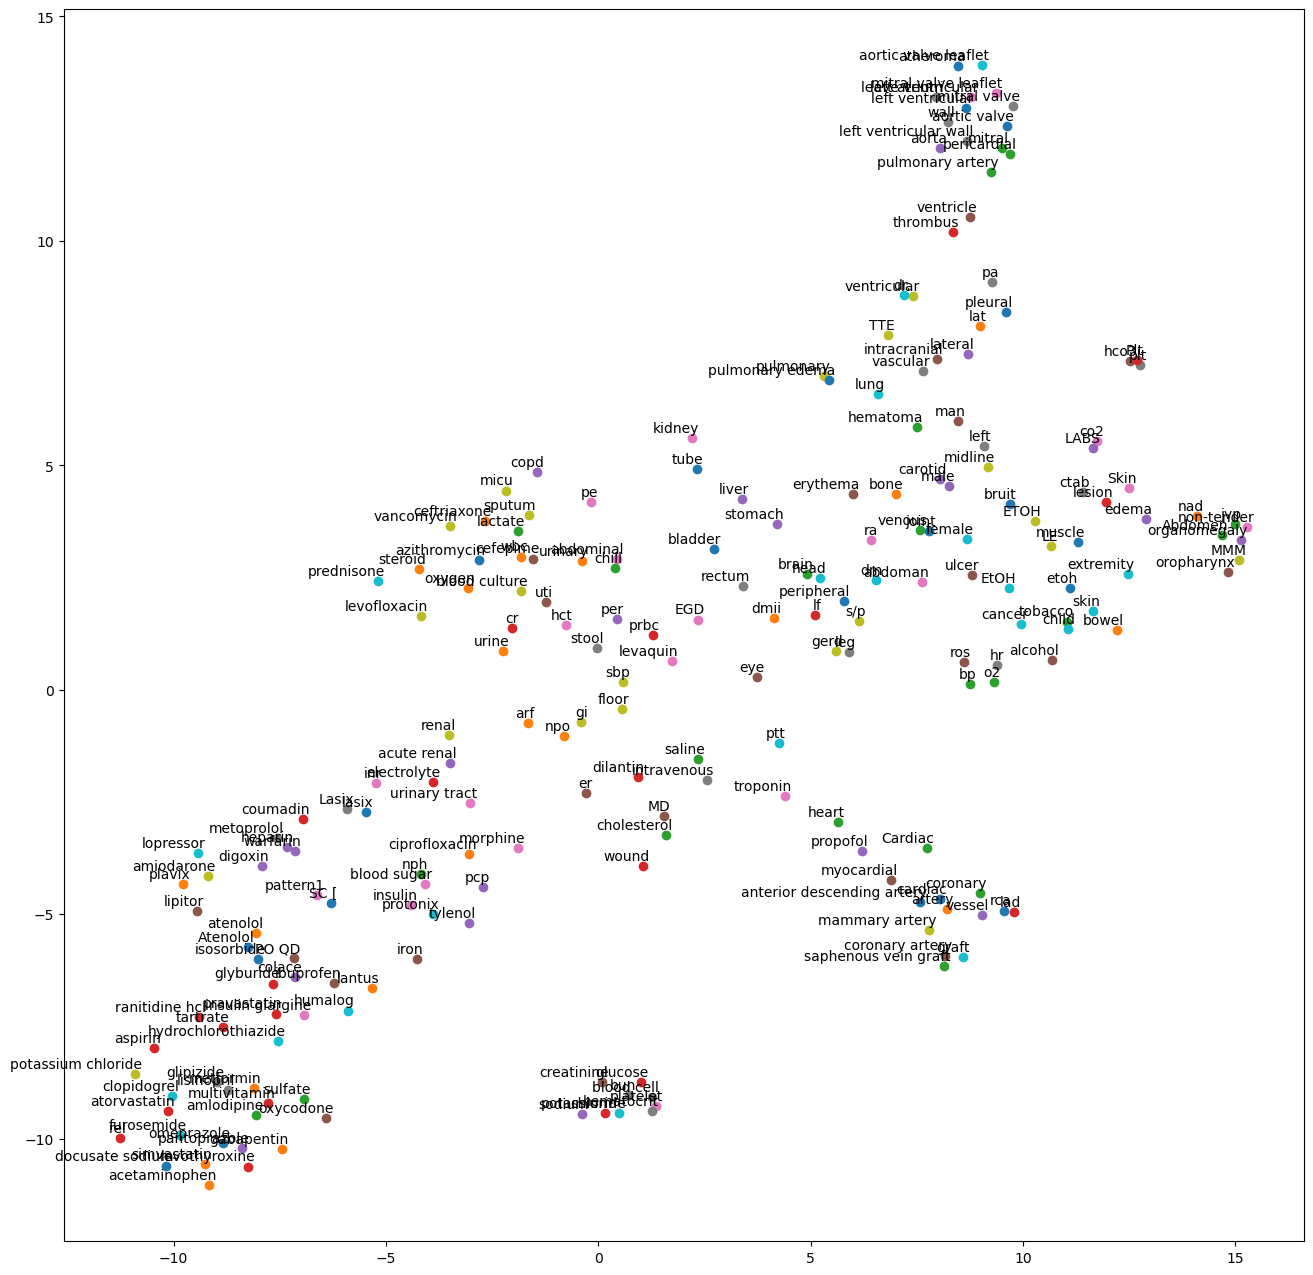

/Users/joseph/miniconda3/envs/deeplearning/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


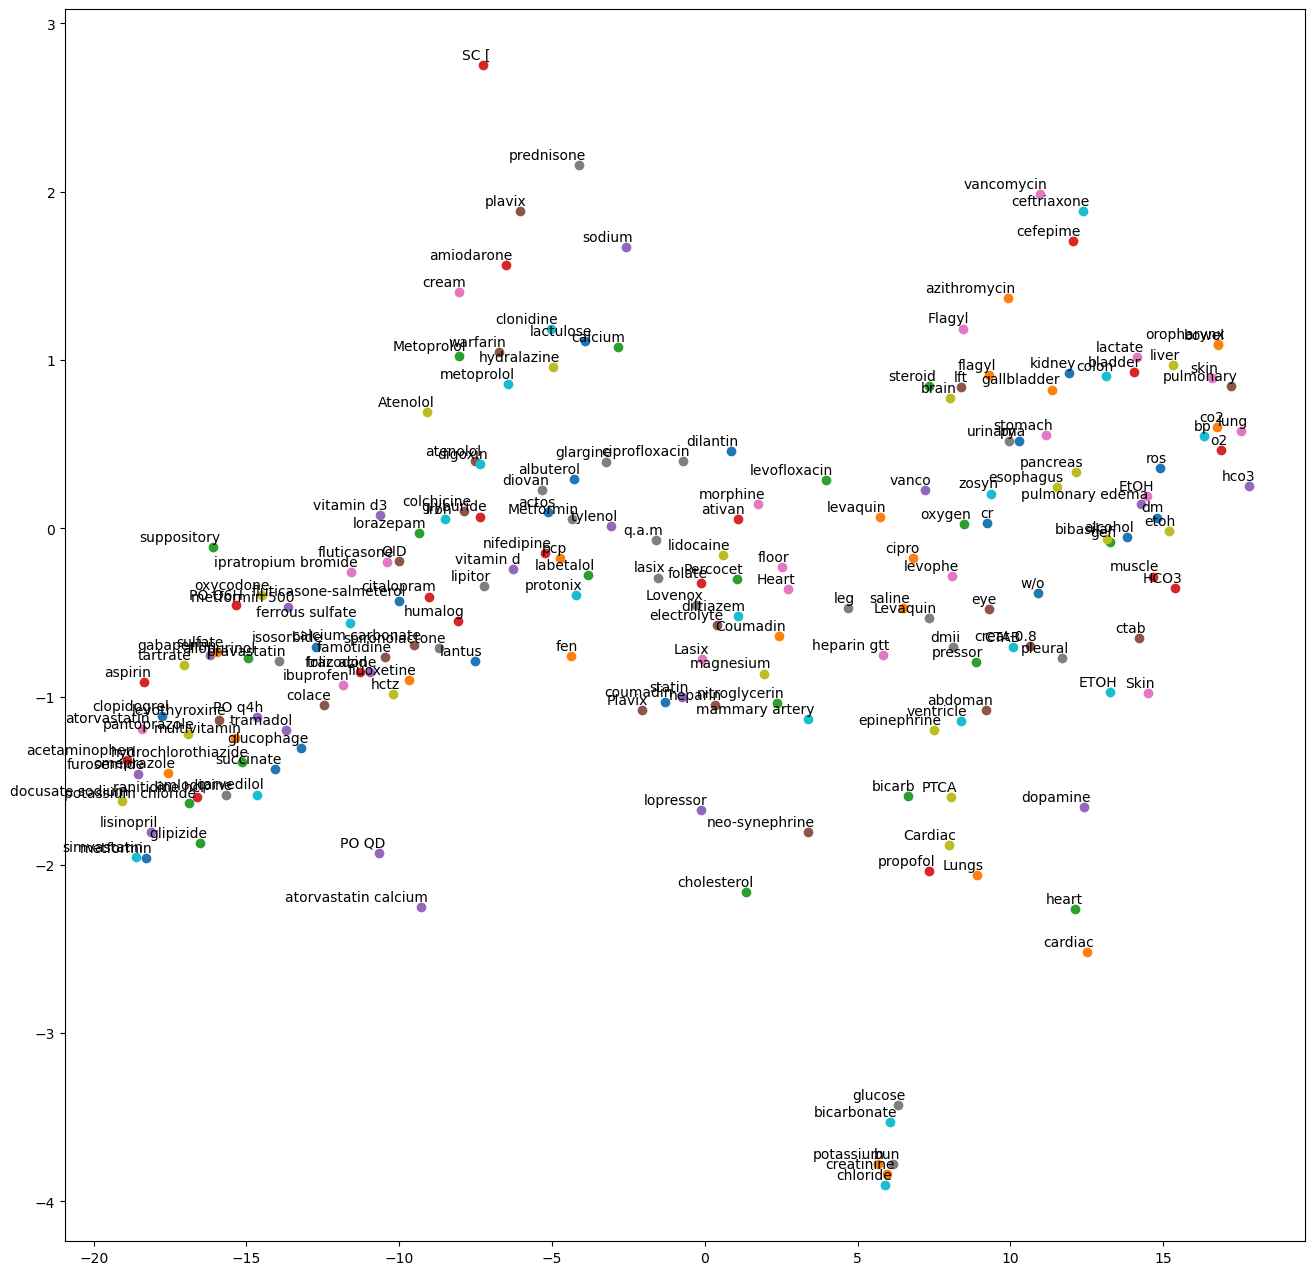

In [159]:
# Borrowed from Word2VECandtSNE.ipynb from AI 395 T, Module 6
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model, words):
    "Creates and TSNE model and plots it"
    labels = words
    tokens = np.array([model.wv[word] for word in words])
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2,
                      init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x, y = zip(*new_values)

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    # Zoom in to see this clump
    # plt.xlim(-2, 3)
    # plt.ylim(-10, -8)
    plt.show()

vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

vocabs2 = model2.wv.key_to_index.keys()
new_v2 = np.array(list(vocabs2))
tsne_plot(model2, new_v2)

In [ ]:
from transformers import AutoTokenizer, AutoModel,BertTokenizer, BertModel
import torch
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

clinical_model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
clinical_tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/joseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joseph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
clinical_tokens = clinical_tokenizer.tokenize(text)

In [ ]:
# Borrowed from ClinicalBERT.ipynb from AI 395 T, Module 7
def clean_text(text):
    # Tokenize the text into words
    words = text.split()

    # Remove special characters and convert to lowercase
    clean_words = [word.lower() for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in clean_words if word not in stop_words]

    # Remove words with less than 4 characters and numbers. This is done in order
    # to reduce noisy data and numbers dont contribute much in any NLP applications
    filtered_words = [word for word in filtered_words
                      if len(word) >= 4 and not word.isdigit()]

    # Remove duplicate words for plotting t-SNE plots
    cleaned_text = " ".join(dict.fromkeys(filtered_words))

    return cleaned_text

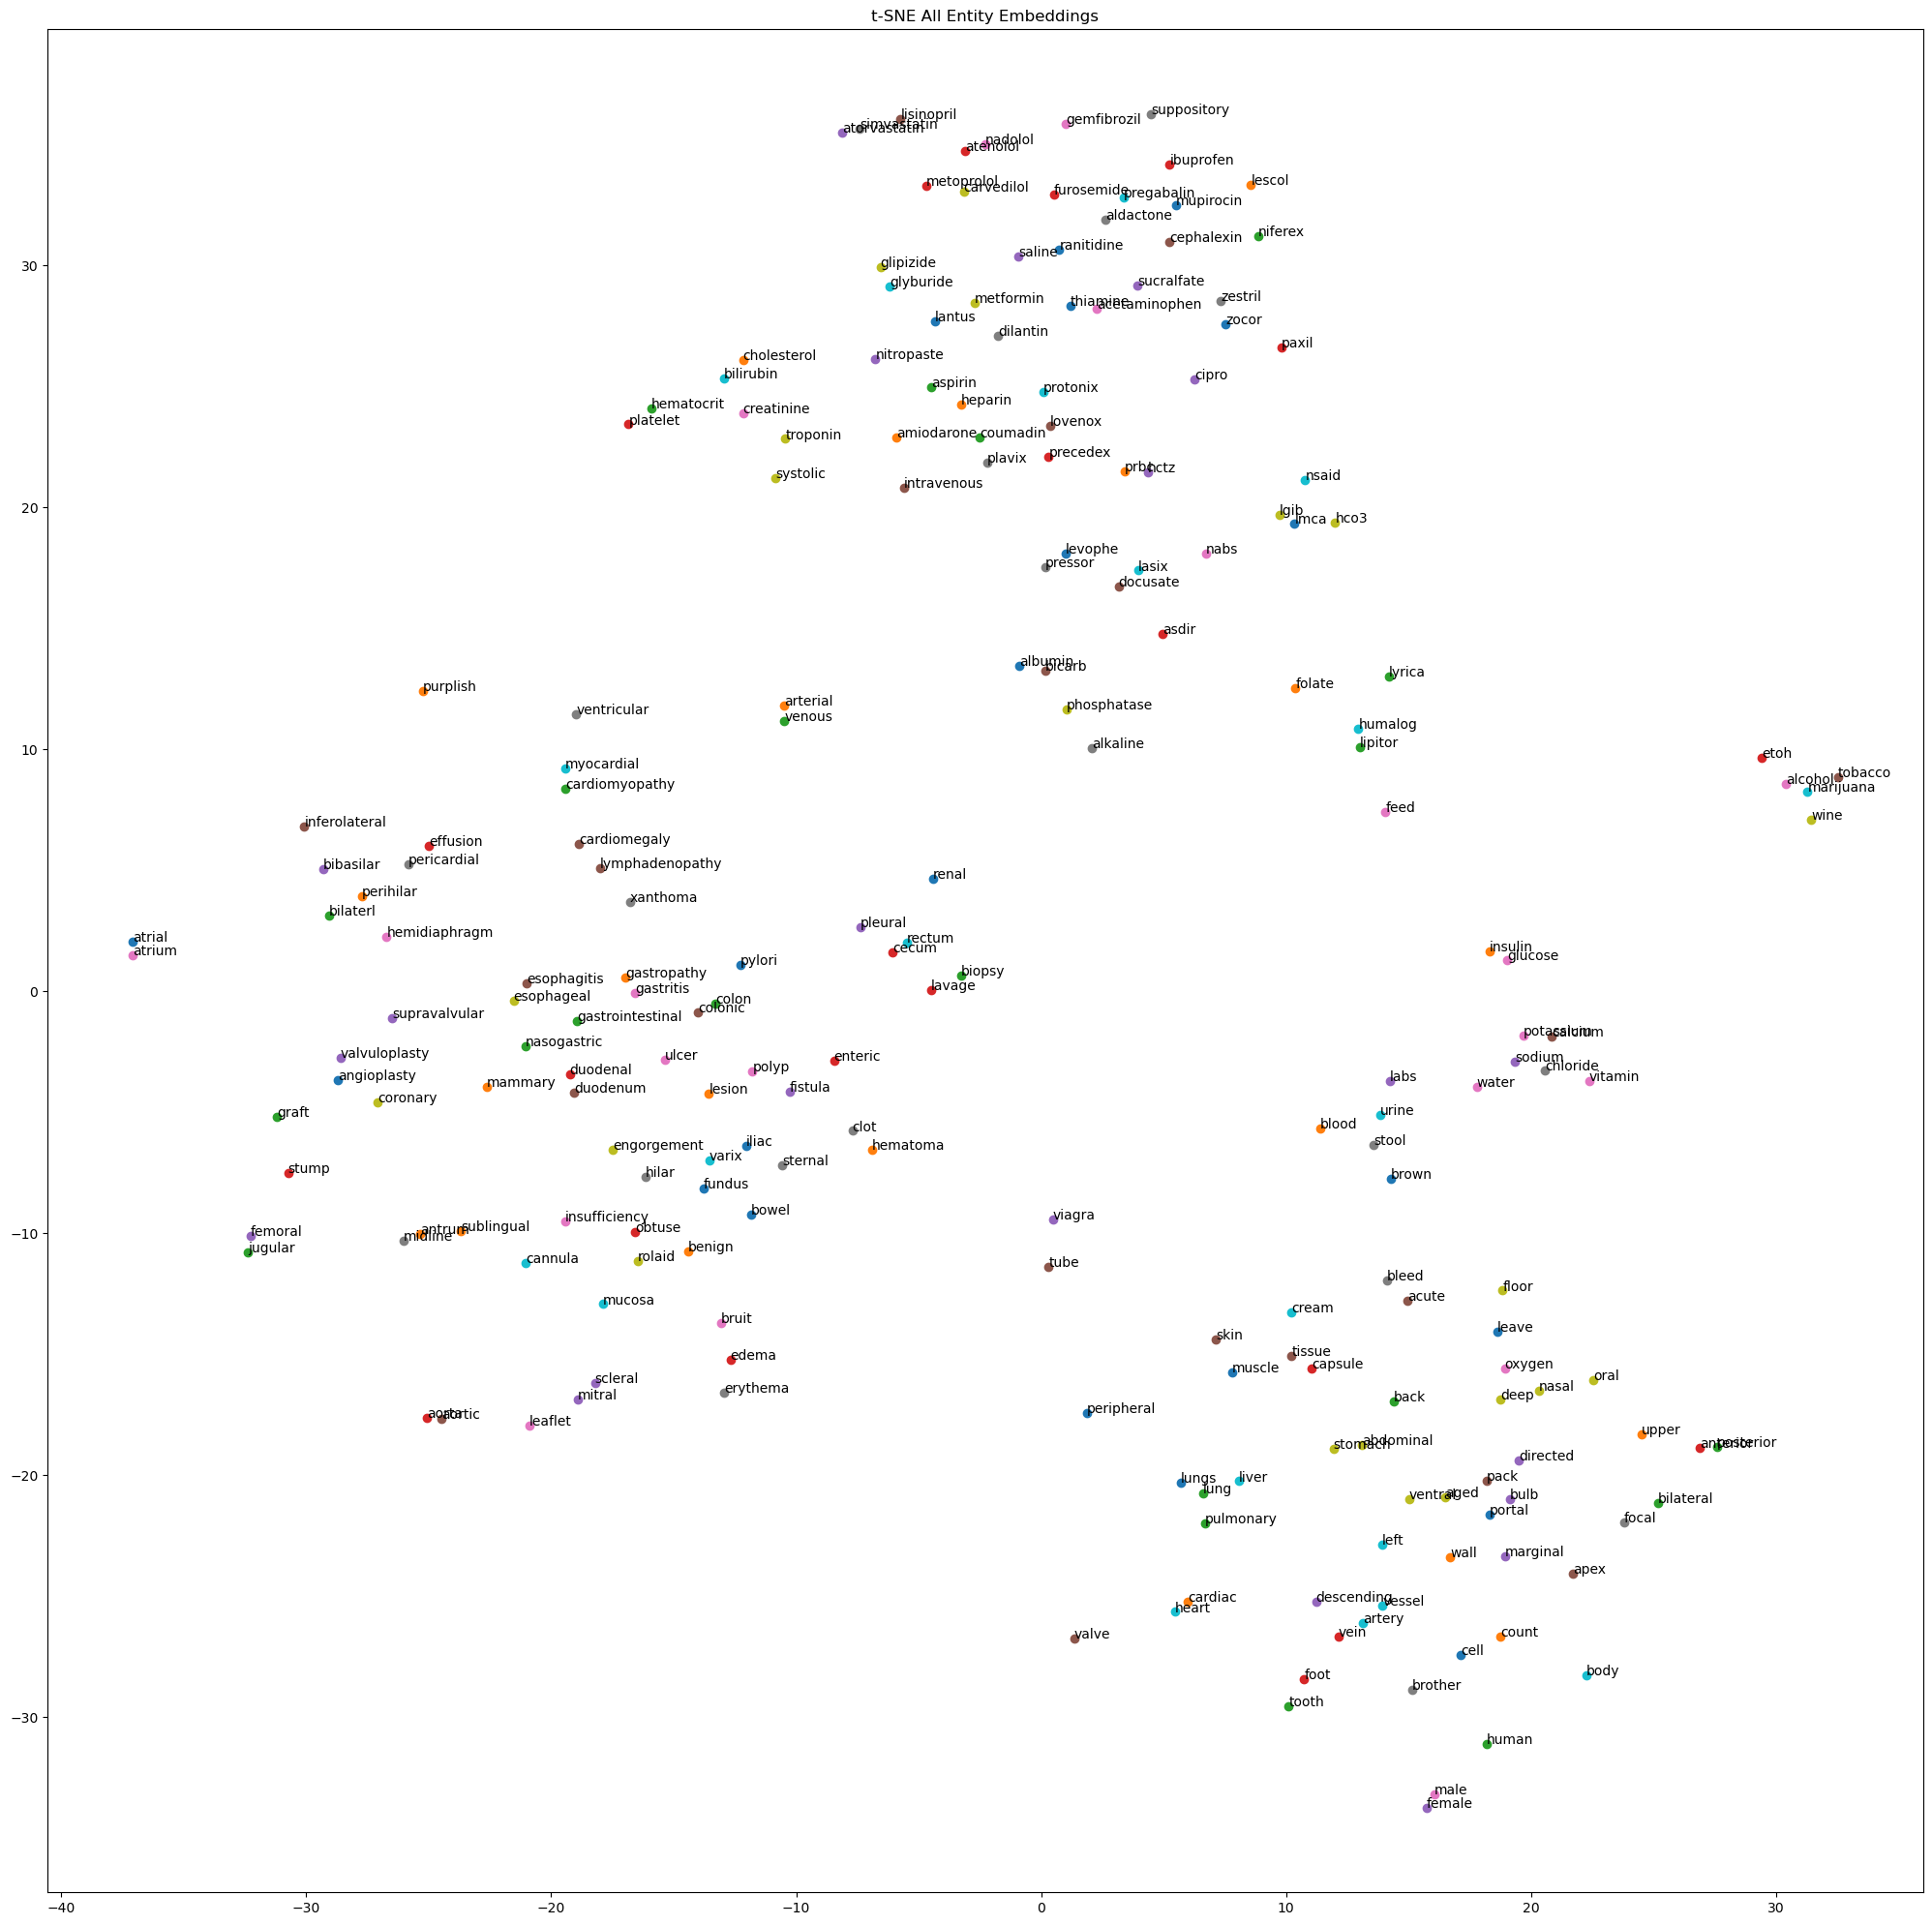

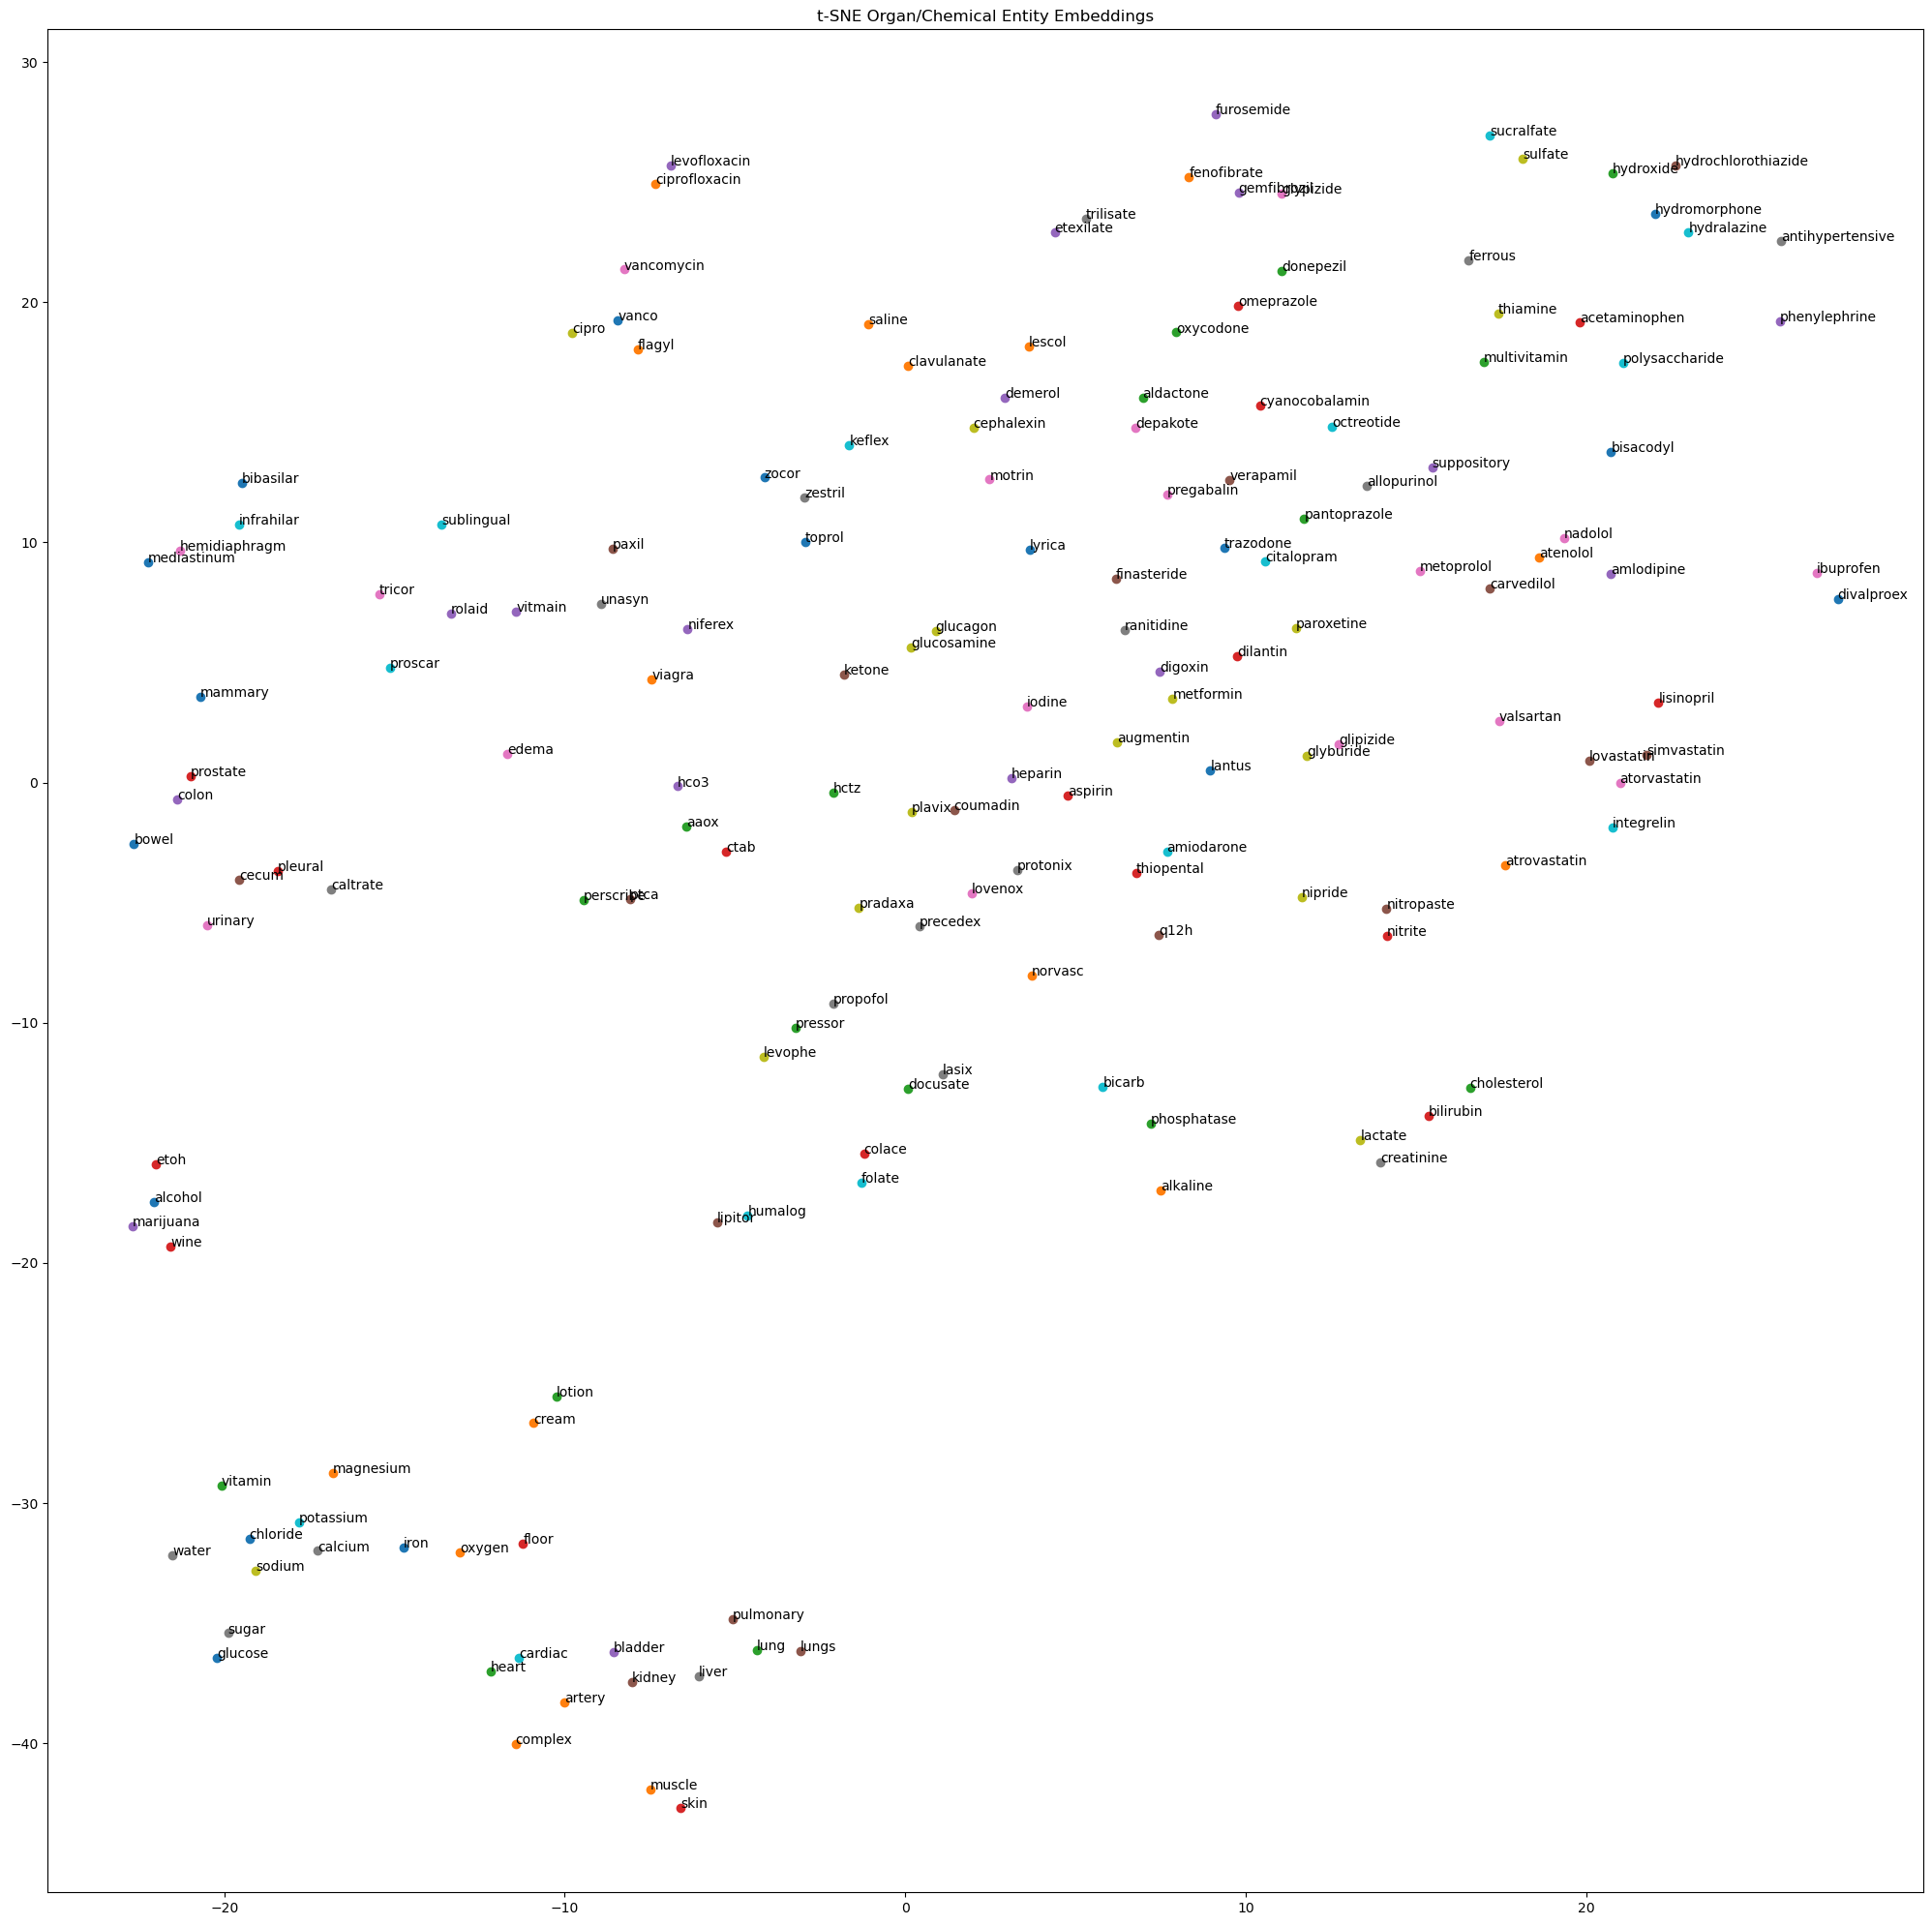

In [ ]:
# Visualization of notes filtered with SciSpacy using ClinicalBert
# Borrowed from ClinicalBERT.ipynb from AI 395 T, Module 7
import numpy as np
from sklearn.manifold import TSNE
import string
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer

# Visualization of notes filtered with SciSpacy using ClinicalBert
for a_corpus, title in [(corpus, 't-SNE All Entity Embeddings'),
                        (corpus_organ_chemical, 't-SNE Organ/Chemical Entity Embeddings')]:
    # Load the BERT model and tokenizer
    clinical_model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
    clinical_tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
    clinical_model.eval()

    flat_corpus = []
    for note in a_corpus:
        flat_corpus.extend(note)
    notes_combined = ' '.join(flat_corpus)
    notes_combined = notes_combined[:5000]
    # Example input text
    input_text = clean_text(notes_combined)

    # Tokenize the input text using the BERT tokenizer
    #input_tokens = clinical_tokenizer.tokenize(input_text)
    input_tokens = input_text.split()
    # Initialize an empty list to store word embeddings
    word_embs = []

    for token in input_tokens:
        # Check if the token is a valid word
        if token not in string.punctuation:
            # Encode the token using the BERT model
            inputs = clinical_tokenizer(token, return_tensors="pt")
            with torch.no_grad():
                outputs = clinical_model(**inputs)
            token_emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
            word_embs.append(token_emb)

    # Perform t-SNE dimensionality reduction
    tsne_model = TSNE(n_components=2, perplexity=10, random_state=42)
    word_embs_2d = tsne_model.fit_transform(np.array(word_embs))

    # Create a scatter plot of the word embeddings in 2D space
    plt.figure(figsize=(25, 25))
    for i in range(len(word_embs_2d)):
        plt.scatter(word_embs_2d[i, 0], word_embs_2d[i, 1])
        plt.annotate(input_tokens[i], (word_embs_2d[i, 0], word_embs_2d[i, 1]))

    plt.title(title)
    plt.show()